In [1]:
# --- Étape 1 : Importation et installation des packages ---
import importlib
import subprocess
import sys

def install_if_needed(package):
    """Installe un package s'il n'est pas déjà installé"""
    try:
        importlib.import_module(package)
    except ImportError:
        print(f"📦 Installation de {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Packages nécessaires
packages = ["pandas", "numpy"]
for pkg in packages:
    install_if_needed(pkg)

# --- Étape 2 : Importation ---
import pandas as pd
import numpy as np

# --- Étape 3 : Chargement du dataset ---
file_path = r"C:\Users\HP\OneDrive\Bureau\Master 2 Data CERGY\Portfolio\Python\US_Accidents_March23.csv"

print("📂 Chargement du dataset...")
df = pd.read_csv(file_path)

# --- Étape 4 : Affichage des premières lignes ---
pd.set_option("display.max_columns", None)  # afficher toutes les colonnes
pd.set_option("display.width", 2000)        # éviter le retour à la ligne
print("\n✅ Aperçu des données :\n")
print(df.head(10))  # affiche les 10 premières lignes


📂 Chargement du dataset...

✅ Aperçu des données :

     ID   Source  Severity           Start_Time             End_Time  Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)                                        Description                     Street          City      County State     Zipcode Country    Timezone Airport_Code    Weather_Timestamp  Temperature(F)  Wind_Chill(F)  Humidity(%)  Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  Precipitation(in) Weather_Condition  Amenity   Bump  Crossing  Give_Way  Junction  No_Exit  Railway  Roundabout  Station   Stop  Traffic_Calming  Traffic_Signal  Turning_Loop Sunrise_Sunset Civil_Twilight Nautical_Twilight Astronomical_Twilight
0   A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00  39.865147 -84.058723      NaN      NaN          0.01  Right lane blocked due to accident on I-70 Eas...                     I-70 E        Dayton  Montgomery    OH       45424      US  US/Eastern         KFFO  2016-02-08 05:58:0

In [2]:
print("🔎 Dimensions du dataset (nb_lignes, nb_colonnes) :")
print(df.shape)

print("\n📌 Liste des colonnes :")
print(df.columns.tolist())

print("\n📊 Types de variables :")
print(df.dtypes)

print("\n❓ Valeurs manquantes (top 20 colonnes les plus concernées) :")
print(df.isna().sum().sort_values(ascending=False).head(20))

print("\n🔁 Vérification des doublons :")
print(df.duplicated().sum())

print("\n📈 Statistiques descriptives sur les variables numériques :")
print(df.describe().T)


🔎 Dimensions du dataset (nb_lignes, nb_colonnes) :
(7728394, 46)

📌 Liste des colonnes :
['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

📊 Types de variables :
ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_La

In [4]:
## --- Conversion des colonnes temporelles ---
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce", format="mixed")
df["End_Time"] = pd.to_datetime(df["End_Time"], errors="coerce", format="mixed")
df["Weather_Timestamp"] = pd.to_datetime(df["Weather_Timestamp"], errors="coerce", format="mixed")

# --- Création de nouvelles variables temporelles ---
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Day"] = df["Start_Time"].dt.day
df["Hour"] = df["Start_Time"].dt.hour
df["DayOfWeek"] = df["Start_Time"].dt.dayofweek  # 0=lundi, 6=dimanche

# --- Durée de l’accident en minutes ---
df["Duration(min)"] = (df["End_Time"] - df["Start_Time"]).dt.total_seconds() / 60

# --- Suppression ou correction des valeurs aberrantes ---
# On fixe quelques seuils réalistes (basés sur physique/météo)
df = df[(df["Temperature(F)"] > -50) & (df["Temperature(F)"] < 130)]
df = df[(df["Pressure(in)"] > 25) & (df["Pressure(in)"] < 35)]
df = df[(df["Visibility(mi)"] >= 0) & (df["Visibility(mi)"] <= 50)]
df = df[(df["Wind_Speed(mph)"] >= 0) & (df["Wind_Speed(mph)"] <= 150)]

print("✅ Nettoyage terminé")
print(df[["Start_Time", "End_Time", "Duration(min)", "Year", "Month", "Day", "Hour", "DayOfWeek"]].head(10))


✅ Nettoyage terminé
            Start_Time            End_Time  Duration(min)  Year  Month  Day  Hour  DayOfWeek
2  2016-02-08 06:49:27 2016-02-08 07:19:27           30.0  2016      2    8     6          0
3  2016-02-08 07:23:34 2016-02-08 07:53:34           30.0  2016      2    8     7          0
4  2016-02-08 07:39:07 2016-02-08 08:09:07           30.0  2016      2    8     7          0
5  2016-02-08 07:44:26 2016-02-08 08:14:26           30.0  2016      2    8     7          0
6  2016-02-08 07:59:35 2016-02-08 08:29:35           30.0  2016      2    8     7          0
7  2016-02-08 07:59:58 2016-02-08 08:29:58           30.0  2016      2    8     7          0
8  2016-02-08 08:00:40 2016-02-08 08:30:40           30.0  2016      2    8     8          0
9  2016-02-08 08:10:04 2016-02-08 08:40:04           30.0  2016      2    8     8          0
10 2016-02-08 08:14:42 2016-02-08 08:44:42           30.0  2016      2    8     8          0
11 2016-02-08 08:21:27 2016-02-08 08:51:27        

In [5]:
print("\nValeurs manquantes après conversion :")
print(df[["Start_Time", "End_Time", "Weather_Timestamp"]].isna().sum())


Valeurs manquantes après conversion :
Start_Time           0
End_Time             0
Weather_Timestamp    0
dtype: int64


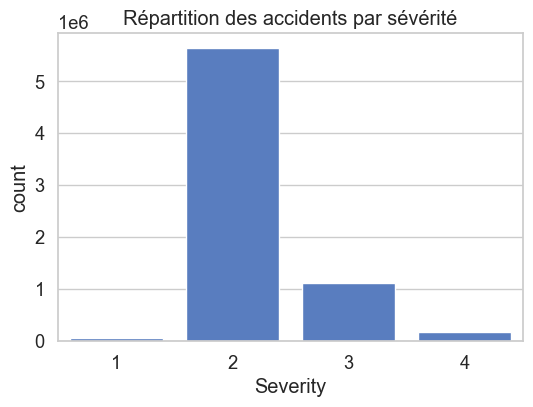

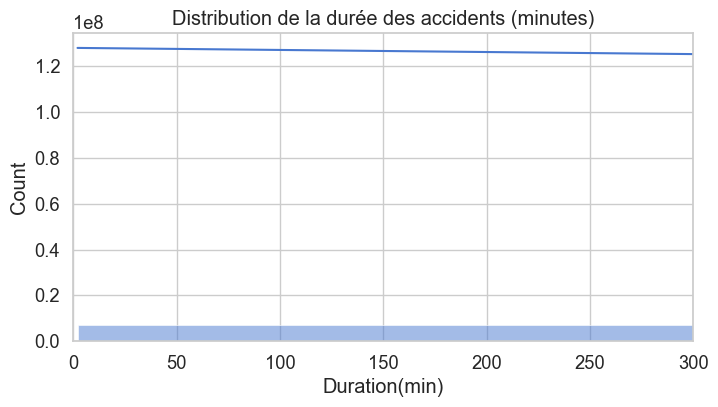

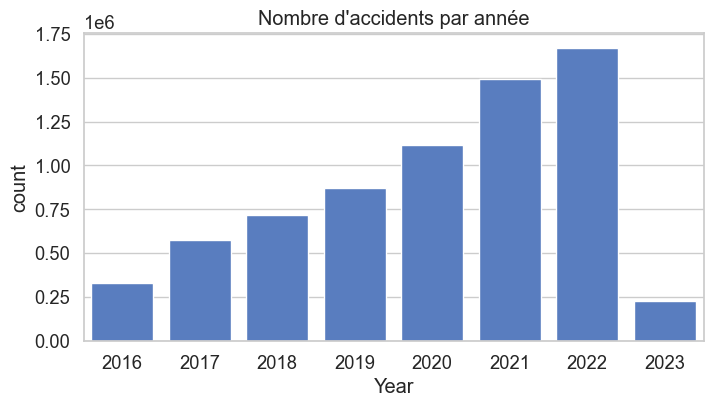

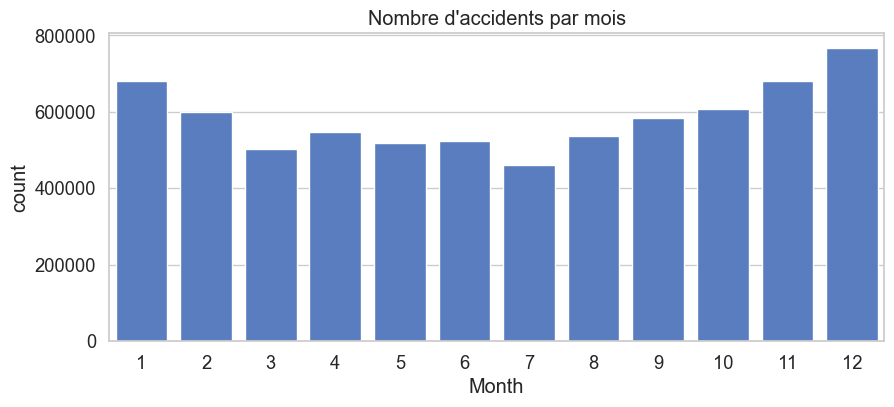

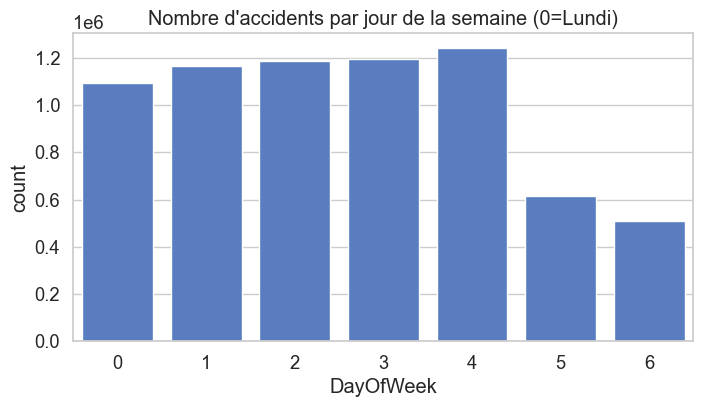

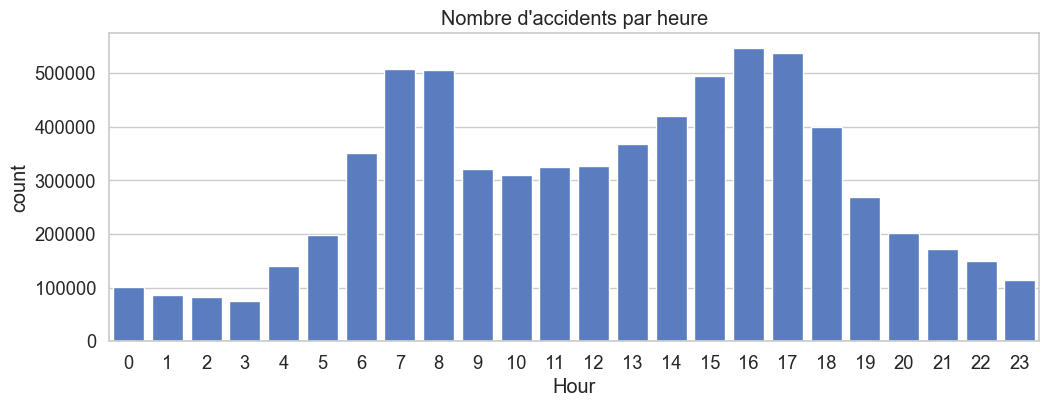

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style seaborn
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# --- 1. Distribution de la gravité ---
plt.figure(figsize=(6,4))
sns.countplot(x="Severity", data=df)
plt.title("Répartition des accidents par sévérité")
plt.show()

# --- 2. Distribution de la durée ---
plt.figure(figsize=(8,4))
sns.histplot(df["Duration(min)"], bins=100, kde=True)
plt.xlim(0, 300)  # zoom : 0 à 5h (la majorité des cas)
plt.title("Distribution de la durée des accidents (minutes)")
plt.show()

# --- 3. Nombre d'accidents par année ---
plt.figure(figsize=(8,4))
sns.countplot(x="Year", data=df)
plt.title("Nombre d'accidents par année")
plt.show()

# --- 4. Accidents par mois ---
plt.figure(figsize=(10,4))
sns.countplot(x="Month", data=df, order=range(1,13))
plt.title("Nombre d'accidents par mois")
plt.show()

# --- 5. Accidents par jour de la semaine ---
plt.figure(figsize=(8,4))
sns.countplot(x="DayOfWeek", data=df)
plt.title("Nombre d'accidents par jour de la semaine (0=Lundi)")
plt.show()

# --- 6. Accidents par heure ---
plt.figure(figsize=(12,4))
sns.countplot(x="Hour", data=df)
plt.title("Nombre d'accidents par heure")
plt.show()


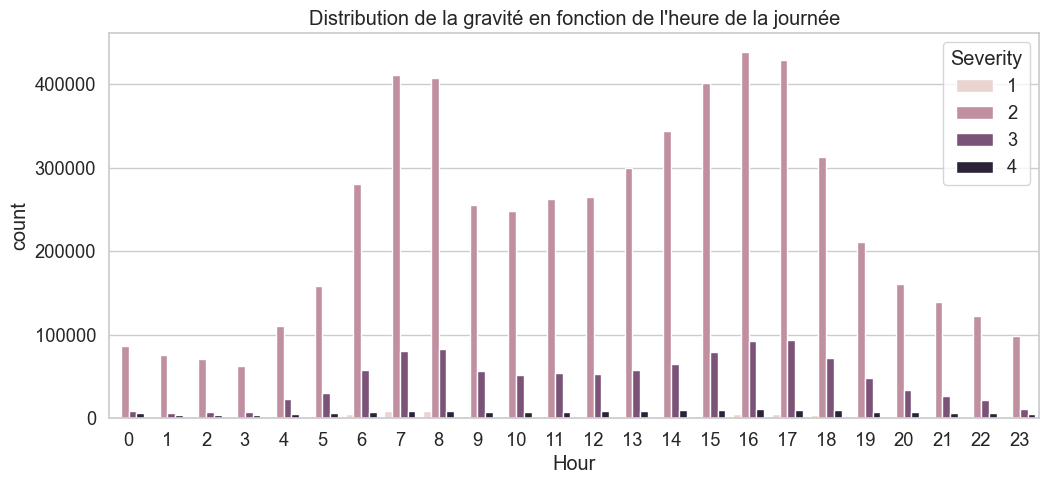

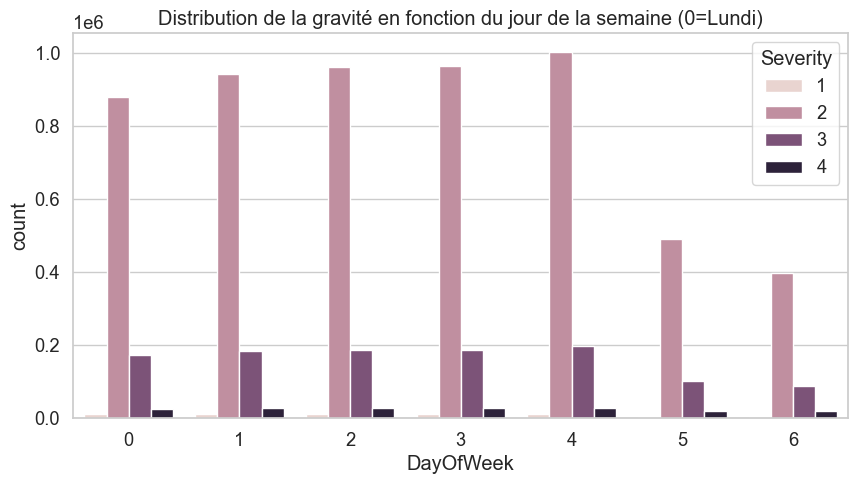

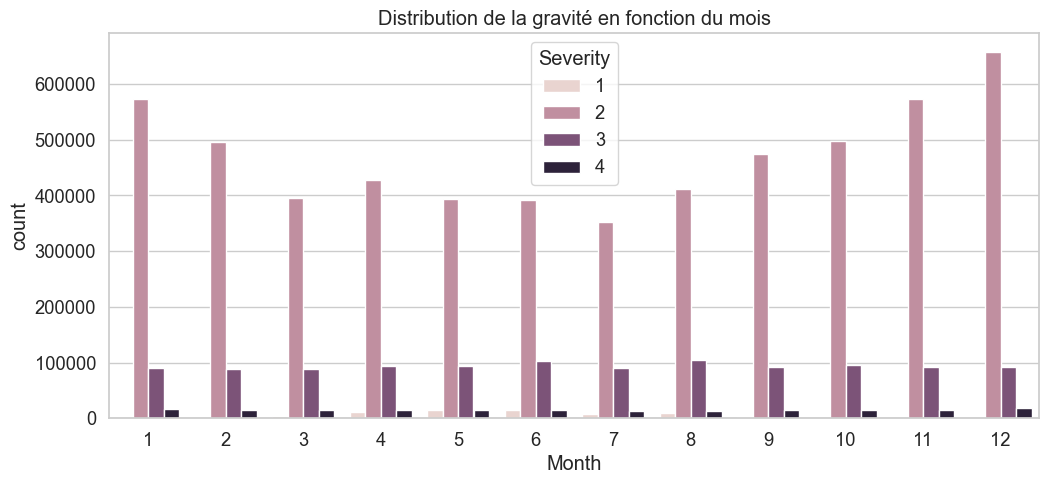

In [7]:
# --- Sévérité en fonction de l'heure ---
plt.figure(figsize=(12,5))
sns.countplot(x="Hour", hue="Severity", data=df)
plt.title("Distribution de la gravité en fonction de l'heure de la journée")
plt.show()

# --- Sévérité en fonction du jour de la semaine ---
plt.figure(figsize=(10,5))
sns.countplot(x="DayOfWeek", hue="Severity", data=df)
plt.title("Distribution de la gravité en fonction du jour de la semaine (0=Lundi)")
plt.show()

# --- Sévérité en fonction du mois ---
plt.figure(figsize=(12,5))
sns.countplot(x="Month", hue="Severity", data=df, order=range(1,13))
plt.title("Distribution de la gravité en fonction du mois")
plt.show()


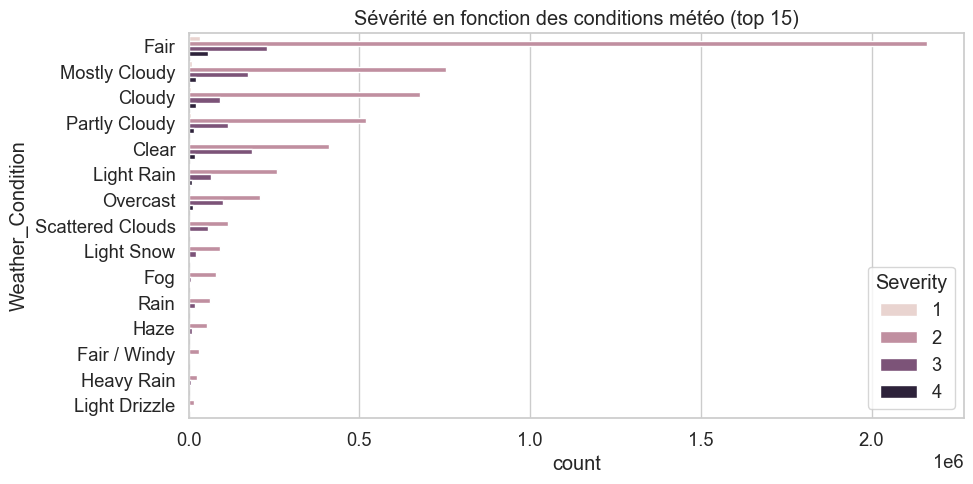

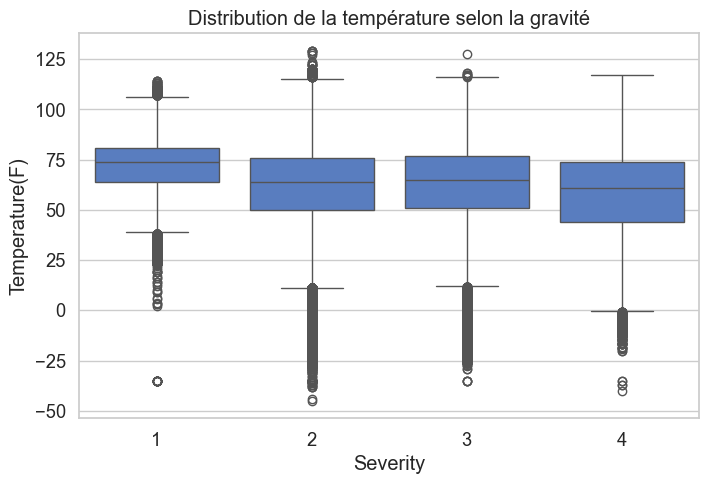

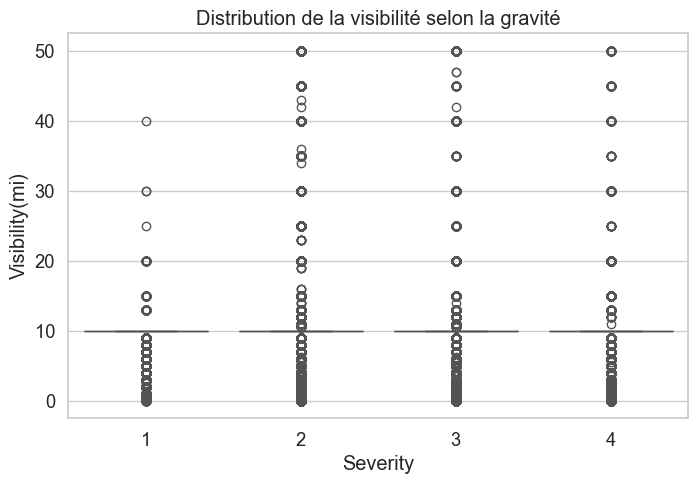

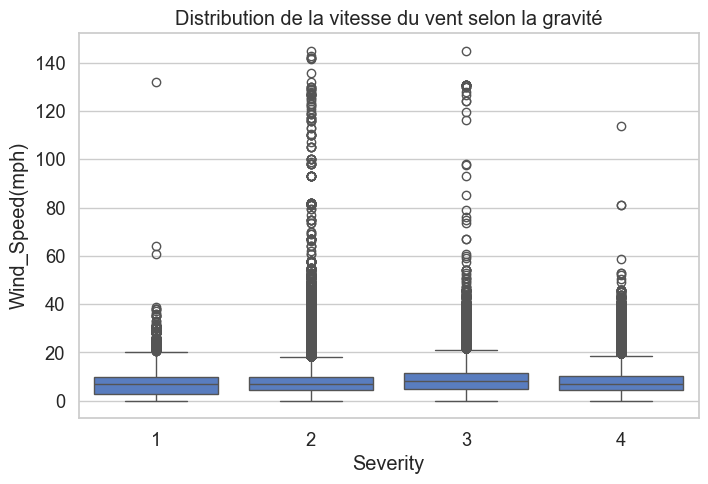

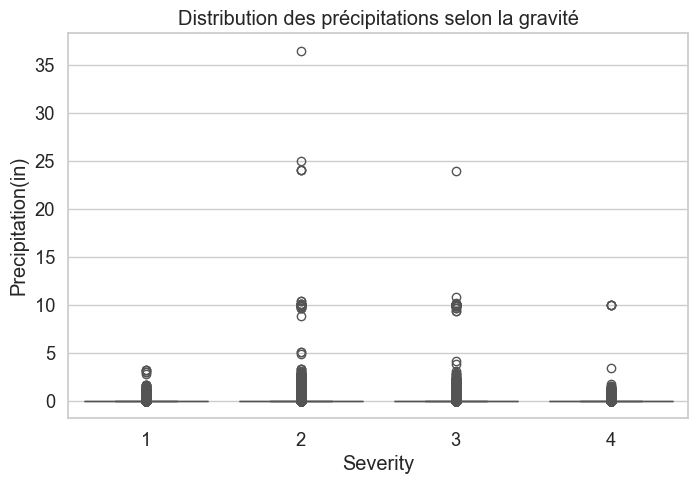

In [8]:
# --- Conditions météo les plus fréquentes ---
plt.figure(figsize=(10,5))
top_weather = df["Weather_Condition"].value_counts().head(15).index
sns.countplot(y="Weather_Condition", data=df[df["Weather_Condition"].isin(top_weather)], order=top_weather, hue="Severity")
plt.title("Sévérité en fonction des conditions météo (top 15)")
plt.show()

# --- Sévérité vs Température ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Severity", y="Temperature(F)", data=df)
plt.title("Distribution de la température selon la gravité")
plt.show()

# --- Sévérité vs Visibilité ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Severity", y="Visibility(mi)", data=df)
plt.title("Distribution de la visibilité selon la gravité")
plt.show()

# --- Sévérité vs Vitesse du vent ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Severity", y="Wind_Speed(mph)", data=df)
plt.title("Distribution de la vitesse du vent selon la gravité")
plt.show()

# --- Sévérité vs Précipitations ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Severity", y="Precipitation(in)", data=df)
plt.title("Distribution des précipitations selon la gravité")
plt.show()


In [9]:
from scipy.stats import f_oneway

def anova_test(var):
    groups = [df[df["Severity"] == sev][var].dropna() for sev in sorted(df["Severity"].unique())]
    F, p = f_oneway(*groups)
    print(f"\n📈 ANOVA - {var}")
    print(f"F = {F:.2f}, p-value = {p:.5f}")
    if p < 0.05:
        print("➡️ Différences significatives entre les niveaux de sévérité ✅")
    else:
        print("➡️ Pas de différences significatives ❌")

# Tests sur les variables numériques
anova_test("Temperature(F)")
anova_test("Visibility(mi)")
anova_test("Wind_Speed(mph)")
anova_test("Precipitation(in)")



📈 ANOVA - Temperature(F)
F = 9028.00, p-value = 0.00000
➡️ Différences significatives entre les niveaux de sévérité ✅

📈 ANOVA - Visibility(mi)
F = 524.01, p-value = 0.00000
➡️ Différences significatives entre les niveaux de sévérité ✅

📈 ANOVA - Wind_Speed(mph)
F = 6641.64, p-value = 0.00000
➡️ Différences significatives entre les niveaux de sévérité ✅

📈 ANOVA - Precipitation(in)
F = 1952.30, p-value = 0.00000
➡️ Différences significatives entre les niveaux de sévérité ✅


In [10]:
from scipy.stats import chi2_contingency

def chi2_test(var):
    contingency = pd.crosstab(df[var], df["Severity"])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"\n📊 Test Chi² - {var}")
    print(f"Chi² = {chi2:.2f}, ddl = {dof}, p-value = {p:.5f}")
    if p < 0.05:
        print("➡️ Relation significative avec la sévérité ✅")
    else:
        print("➡️ Pas de relation significative ❌")

# Tests sur les variables catégorielles
chi2_test("DayOfWeek")
chi2_test("Month")
chi2_test("Weather_Condition")



📊 Test Chi² - DayOfWeek
Chi² = 10499.51, ddl = 18, p-value = 0.00000
➡️ Relation significative avec la sévérité ✅

📊 Test Chi² - Month
Chi² = 124639.89, ddl = 33, p-value = 0.00000
➡️ Relation significative avec la sévérité ✅

📊 Test Chi² - Weather_Condition
Chi² = 324667.48, ddl = 414, p-value = 0.00000
➡️ Relation significative avec la sévérité ✅


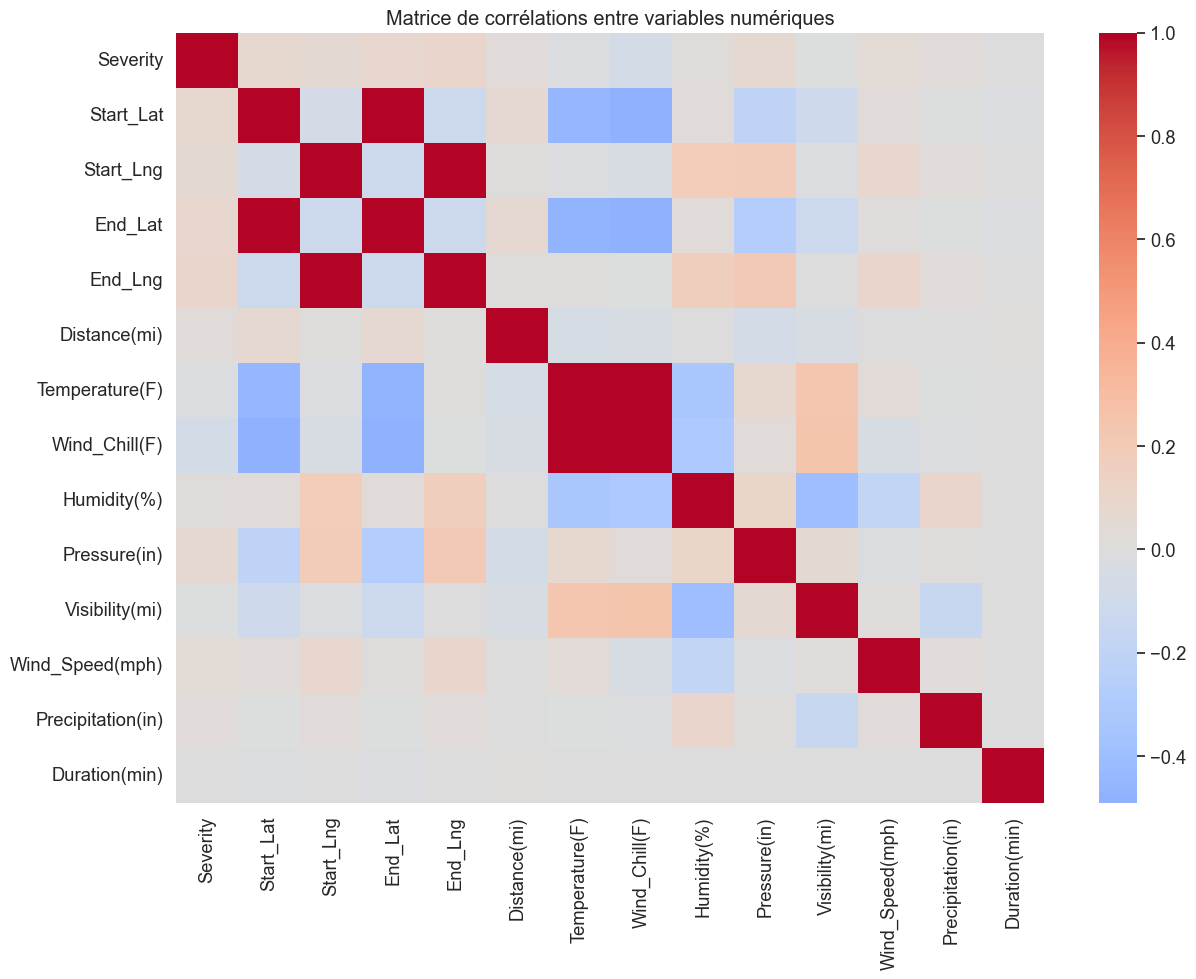

In [11]:
# Sélection des colonnes numériques
num_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Matrice de corrélations
corr = df[num_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Matrice de corrélations entre variables numériques")
plt.show()


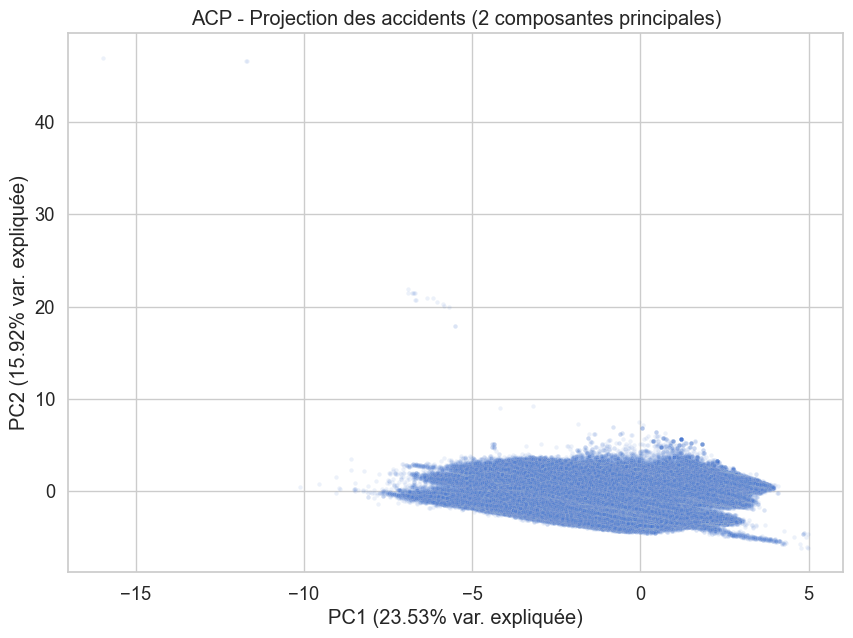


🔎 Variance expliquée par les 5 premières composantes :
[0.23526135 0.1592364 ]


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Préparation des données numériques (on enlève les NaN)
X = df[num_cols].dropna()

# Standardisation (important pour PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ACP avec 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot des individus
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], alpha=0.1, s=10)
plt.title("ACP - Projection des accidents (2 composantes principales)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% var. expliquée)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% var. expliquée)")
plt.show()

# Variance expliquée
print("\n🔎 Variance expliquée par les 5 premières composantes :")
print(pca.explained_variance_ratio_[:5])


C:\Users\HP\anaconda3\envs\geopandas_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


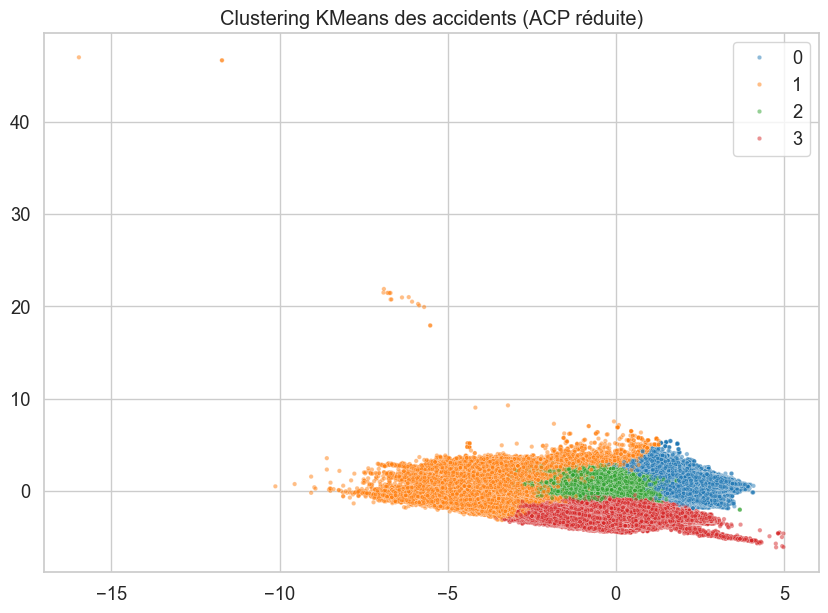

In [14]:
from sklearn.cluster import KMeans

# Réduction à 10 variables principales pour le clustering
pca_clust = PCA(n_components=10)
X_pca_clust = pca_clust.fit_transform(X_scaled)

# KMeans avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca_clust)

# Visualisation des clusters sur 2 premières composantes
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca_clust[:,0], y=X_pca_clust[:,1], hue=clusters, palette="tab10", s=10, alpha=0.5)
plt.title("Clustering KMeans des accidents (ACP réduite)")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# --- 1. Sélection des features ---
features = ["Hour", "DayOfWeek", "Month", "Distance(mi)", 
            "Temperature(F)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)", 
            "Weather_Condition", "State"]

X = df[features].copy()
y = df["Severity"]

# --- 2. Gestion des NaN ---
X = X.fillna({
    "Temperature(F)": X["Temperature(F)"].median(),
    "Visibility(mi)": X["Visibility(mi)"].median(),
    "Wind_Speed(mph)": X["Wind_Speed(mph)"].median(),
    "Precipitation(in)": 0,
    "Weather_Condition": "Unknown",
    "State": "Unknown"
})

# --- 3. Split train/test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 4. Préprocesseur ---
num_features = ["Hour", "DayOfWeek", "Month", "Distance(mi)", 
                "Temperature(F)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
cat_features = ["Weather_Condition", "State"]

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", max_categories=50), cat_features)
])

# --- 5. Modèle baseline : Régression logistique ---
log_reg = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", LogisticRegression(max_iter=500))])

log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

print("📊 Logistic Regression")
print(classification_report(y_test, y_pred_lr))

# --- 6. Modèle avancé : Random Forest ---
rf = Pipeline(steps=[("preprocessor", preprocessor),
                     ("classifier", RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🌲 Random Forest")
print(classification_report(y_test, y_pred_rf))

# --- 7. Matrice de confusion ---
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


📊 Logistic Regression
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     12880
           2       0.81      0.99      0.89   1129110
           3       0.42      0.04      0.07    224479
           4       0.19      0.00      0.00     35282

    accuracy                           0.80   1401751
   macro avg       0.35      0.26      0.24   1401751
weighted avg       0.72      0.80      0.73   1401751



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# --- 1. Logistic Regression avec poids de classes ---
log_reg_balanced = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500, class_weight="balanced"))
])

log_reg_balanced.fit(X_train, y_train)
y_pred_lr_bal = log_reg_balanced.predict(X_test)

print("📊 Logistic Regression (class_weight='balanced')")
print(classification_report(y_test, y_pred_lr_bal))

# --- 2. Random Forest avec poids de classes ---
rf_balanced = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=200, random_state=42, 
                                          n_jobs=-1, class_weight="balanced"))
])

rf_balanced.fit(X_train, y_train)
y_pred_rf_bal = rf_balanced.predict(X_test)

print("\n🌲 Random Forest (class_weight='balanced')")
print(classification_report(y_test, y_pred_rf_bal))

# --- 3. Logistic Regression avec SMOTE ---
smote = SMOTE(random_state=42, sampling_strategy="auto")

log_reg_smote = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", smote),
    ("classifier", LogisticRegression(max_iter=500))
])

log_reg_smote.fit(X_train, y_train)
y_pred_lr_smote = log_reg_smote.predict(X_test)

print("\n📊 Logistic Regression + SMOTE")
print(classification_report(y_test, y_pred_lr_smote))
